# A. Loading Dataset from ScikitLearn
Step 1
Load iris dataset from ScikitLearn using load_iris(). Assign the dataset to X and the target values to y.


In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()
# ref: https://runebook.dev/en/docs/scikit_learn/modules/generated/sklearn.datasets.load_iris

In [2]:
print(iris_dataset.keys())
# the keys from the dictionary is shown.


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
print(iris_dataset.target_names)
# ref: https://medium.com/analytics-vidhya/exploration-of-iris-dataset-using-scikit-learn-part-1-8ac5604937f8

['setosa' 'versicolor' 'virginica']


In [4]:
print(iris_dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# https://www.ritchieng.com/machine-learning-iris-dataset/
print(type(iris_dataset.data))

<class 'numpy.ndarray'>


In [6]:
print(iris_dataset.data.shape)

(150, 4)


In [7]:
# ref: https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
#ref: https://www.ritchieng.com/machine-learning-iris-dataset/
#ref: https://datatofish.com/pandas-dataframe-to-dictionary/
import pandas as pd
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset['feature_names'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
print(type(iris_dataset.target))

<class 'numpy.ndarray'>


In [9]:
print(iris_dataset['target'].shape)

(150,)


In [10]:
print(iris_dataset.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
import numpy as np
print(np.unique(iris_dataset.target))

[0 1 2]


In [12]:
X= iris_dataset.data
y= iris_dataset.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y, random_state=0)

# ref ::::: https://www.ritchieng.com/machine-learning-iris-dataset/

In [13]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
X_new = np.array([[5, 1.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)
print("---------------------")
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

X_new.shape: (1, 4)
---------------------
Prediction: [0]
Predicted target name: ['setosa']


In [16]:
# Evaluate your model on the test dataste, print the accuracy of the model
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("---------------------")
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
print("---------------------")
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
---------------------
Test set score: 0.97
---------------------
Test set score: 0.97


# B. Loading a Dataset and exploring it
Step 1
Import the modules needed to explore the data

​

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
autompg_dataframe = pd.read_csv('auto_mpg.csv')

print("------------")
print("------------")
print(autompg_dataframe.index)
print("------------")
print("------------")
for col in autompg_dataframe.columns:
    print(col)

# ref: https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
# ref: https://stackoverflow.com/questions/44452751/pandas-dataframe-rangeindex

------------
------------
RangeIndex(start=0, stop=398, step=1)
------------
------------
mpg
cylinders
displacement
horsepower
weight
acceleration
model year
origin
car name


In [19]:
autompg_dataframe.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [20]:
y=autompg_dataframe['mpg']
X = autompg_dataframe.drop('mpg',axis=1)
# ref: https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
autompg_dataframe.shape

(398, 9)

In [21]:
autompg_dataframe.isnull().any()
# ref: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

In [22]:
autompg_dataframe.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [23]:
autompg_dataframe.horsepower.unique()
# ref: https://www.geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
       104., 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [24]:
autompg_dataframe.describe(include='all')
# ref: https://datatofish.com/descriptive-statistics-pandas/#:~:text=To%20get%20the%20descriptive%20statistics%20for%20a%20specific,descriptive%20statistics%20for%20an%20entire%20DataFrame%3A%20df.describe%20%28include%3D%27all%27%29

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [25]:
autompg_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [26]:
autompg_dataframe['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

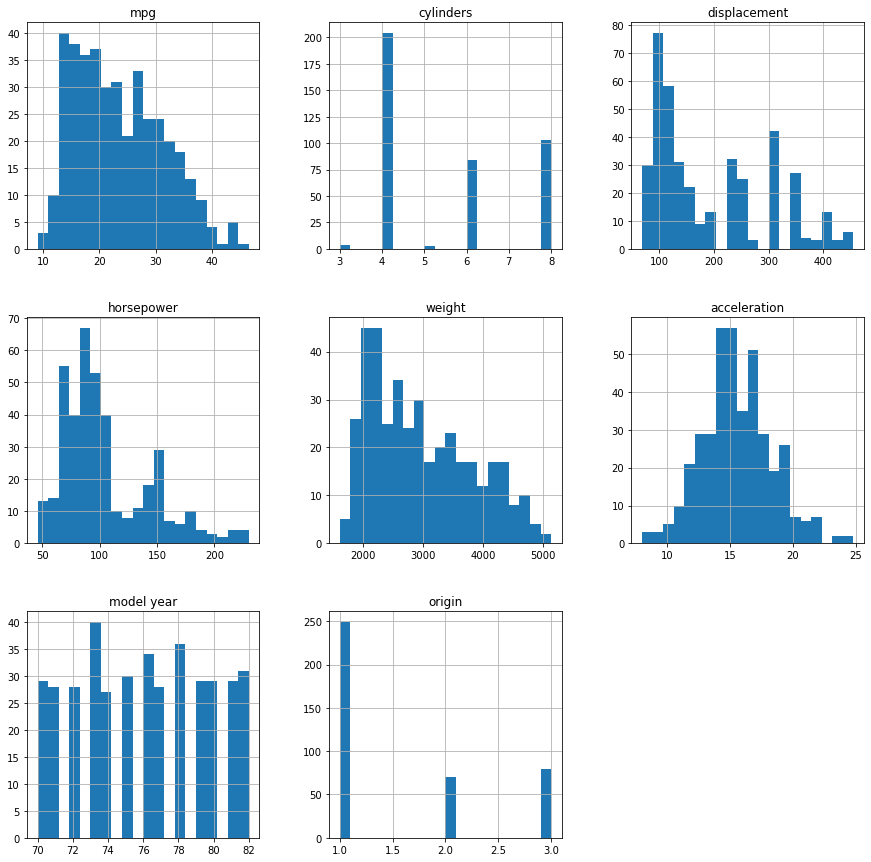

In [27]:
autompg_dataframe.hist(figsize=(15,15),bins=20)
plt.show()

In [28]:

# function to returns scaledata function
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

 
# Applying a user defined function to each
# column which will add value in each
# column by given number
new_autompg_dataframe = autompg_dataframe.copy()

# apply the function to the salary column using apply()
new_autompg_dataframe['displacement'] = scale(new_autompg_dataframe['displacement'])
new_autompg_dataframe['horsepower'] = scale(new_autompg_dataframe['horsepower'])
new_autompg_dataframe['acceleration'] = scale(new_autompg_dataframe['acceleration'])
new_autompg_dataframe['weight'] = scale(new_autompg_dataframe['weight'])
new_autompg_dataframe['mpg'] = scale(new_autompg_dataframe['mpg'])
 
# Output
new_autompg_dataframe.round(2)
# ref: https://www.geeksforgeeks.org/apply-a-function-to-each-row-or-column-in-dataframe-using-pandas-apply/
# ref: https://saturncloud.io/blog/how-to-apply-a-function-to-a-specific-column-of-a-pandas-dataframe/


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0.24,8,0.62,0.46,0.54,0.24,70,1,chevrolet chevelle malibu
1,0.16,8,0.73,0.65,0.59,0.21,70,1,buick skylark 320
2,0.24,8,0.65,0.57,0.52,0.18,70,1,plymouth satellite
3,0.19,8,0.61,0.57,0.52,0.24,70,1,amc rebel sst
4,0.21,8,0.60,0.51,0.52,0.15,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0.48,4,0.19,0.22,0.33,0.45,82,1,ford mustang gl
394,0.93,4,0.07,0.03,0.15,0.99,82,2,vw pickup
395,0.61,4,0.17,0.21,0.19,0.21,82,1,dodge rampage
396,0.51,4,0.13,0.18,0.29,0.63,82,1,ford ranger


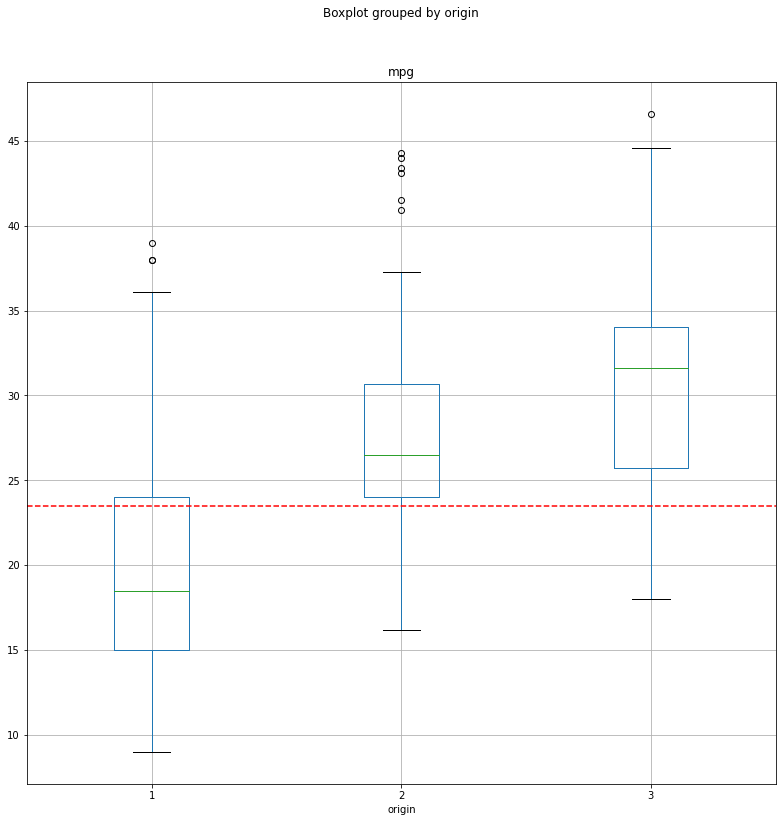

In [44]:
fig1 = autompg_dataframe.boxplot(column = 'mpg', by='origin', figsize=(13,13))
plt.axhline(autompg_dataframe.mpg.mean(), color='r', linestyle='dashed', linewidth = 1.5)

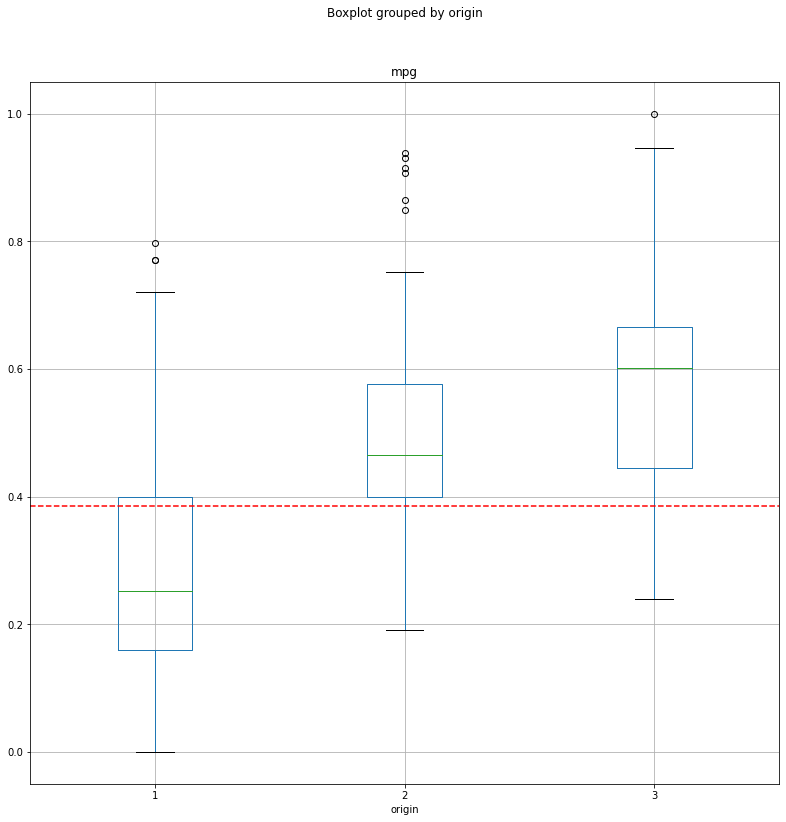

In [45]:
fig1 = new_autompg_dataframe.boxplot(column = 'mpg', by='origin', figsize=(13,13))
plt.axhline(new_autompg_dataframe.mpg.mean(), color='r', linestyle='dashed', linewidth = 1.5)